# Classification

## Learning Objectives:

- Understand when to use a classification model.
- Build a classification model using logistic regression.
- Learn how to create a confusion matrix to evaluate the model performance.
- Understand various classification evaluation metrics like precision, recall, sensitivity, specificity and AUC.
- Learn to find optimal cutoff probability for model deployment.

## What is a classification problem?

- Classification are supervised learning problems, which takes a discrete value as response variable (Y). 
- Classification models predict the probability of an observation belonging to a class. 

Few examples of classification problem are,

- A bank may want to classify the customers based on the risk such as low risk or high risk customers.
- A business may want to predict if a customer is likely to churn or not.
- HR department of firm may want to predict if an applicant would accept an offer or not.
- Predict outcome of a sporting event, for example, if India is going to win or not aginst Newzeland in test championship. 
- Sentiment about a product or service in social media can be classified as positive, negative, or neutral, which enables an organization to understand sentiments about their product/service.

Classification predictions may have binary or multiple outcomes or classes. 
- Binary outcomes are called binary classification 
- Multiple class outcome are called multinomial classification. 

## Logistic Regression

- One of the widely used algorithms for classification problem is logistic regression.

For example, in classifying what is the probability of suffering from heart disease as someone gets older i.e increasing age. The outcome is either someone suffers from heart disease or not and the independent variable is *age*. Then a logistic or sigmoid function can be fit to explain the probability of suffering from heart disease with respect to age as shown in the diagram. 

<img src='./prob_chd.png' width=500>

This function is expressed as:

P(Heart Disease = 1) = f(age) =  $\frac{e^{\beta_{0}+ \beta_{1} age}}{1+e^{\beta_{0}+ \beta_{1} age}}$

So, a binary logistic regression model is given by,

- P(Y=1) = $\frac{e^z}{1+e^z}$

where, Z = $\beta_{0} + \beta_{1}X_{1} + \beta_{2}X_{2} + \beta_{3}X_{3} + .... +\beta_{m}X_{m}$

Here, $X_{1}, X_{2}, …, X_{m}$ are the independent variables. The independent variables can either be continuous or discrete. 

We will take the example of german credit rating dataset to dive deeper into the model building and evaluation.

## German Credit Rating Classification

German credit rating dataset contains attributes of the persons who availed the credit and the status of the credit.

The status of the credit is indicated by 0 for good credits and 1 for bad credits.

The detailed description of variables can be found at the following link.

https://archive.ics.uci.edu/ml/datasets/Statlog+%28German+Credit+Data%29

| Variable | Variable Type| Description | Categories | 
| :----------| :-------------- |:--------------| :--------------|
|checkin_acc| categorical | Status of existing checking account | <ul><li> A11 : ... < 0 DM </li><li> A12 : 0 <= ... < 200 DM </li><li> A13 : ... >= 200 DM / salary assignments for at least 1 year </li><li> A14 : no checking account </li></ul>|
|duration| numerical | Status of existing checking account | |
|credit_history| categorical | Credit History | <ul><li>A30 : no credits taken/ all credits paid back duly </li><li>A31 : all credits at this bank paid back duly </li><li>A32 : existing credits paid back duly till now </li><li>A33 : delay in paying off in the past </li><li>A34 : critical account/ other credits existing (not at this bank) </li></ul>|
|amount| numerical | Status of existing checking account | |
|savings_acc| Categorical | Status of existing checking account | <ul><li>A61 : ... < 100 DM </li><li>A62 : 100 <= ... < 500 DM </li><li>A63 : 500 <= ... < 1000 DM </li><li>A64 : .. >= 1000 DM </li><li>A65 : unknown/ no savings account </li></ul>|
|present_emp_since| Categorical | Status of existing checking account | <ul><li>A71 : unemployed </li><li>A72 : ... < 1 year </li><li>A73 : 1 <= ... < 4 years </li><li>A74 : 4 <= ... < 7 years </li><li>A75 : .. >= 7 years </li></ul>|
|inst_rate| numerical | Installment rate  | |
|personal_status| Categorical | Personal status and sex | <ul><li>A91 : male : divorced/separated </li><li>A92 : female : divorced/separated/married </li><li>A93 : male : single </li><li>A94 : male : married/widowed </li><li>A95 : female : single </li></ul>|
|residing_since| numerical | residing since in years | |
|age| numerical | age in years | |
|inst_plans| categorical | Status of existing checking account | <ul><li>A141 : bank </li><li>A142 : stores </li><li>A143 : none </li></ul> |
|num_credits| Categorical | Status of existing checking account | <ul><li> A11 : ... < 0 DM </li><li> A12 : 0 <= ... < 200 DM </li><li> A13 : ... >= 200 DM / salary assignments for at least 1 year </li><li> A14 : no checking account </li></ul>|
|job| categorical | job | <ul><li>A171 : unemployed/ unskilled - non-resident </li><li>A172 : unskilled - resident </li><li>A173 : skilled employee / official </li> <li>A174 : management/ self-employed/highly qualified employee/ officer </li> </ul> |
|status| categorical | Credit status | <ul><li> 0: Good Credit </li><li> 1: Bad Credit </li></ul>|

### Loading Dataset 

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
import pandas as pd
import numpy as np

credit_df = pd.read_csv( "German_Credit_Data.csv" )
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   checkin_acc        1000 non-null   object
 1   duration           1000 non-null   int64 
 2   credit_history     1000 non-null   object
 3   amount             1000 non-null   int64 
 4   savings_acc        1000 non-null   object
 5   present_emp_since  1000 non-null   object
 6   inst_rate          1000 non-null   int64 
 7   personal_status    1000 non-null   object
 8   residing_since     1000 non-null   int64 
 9   age                1000 non-null   int64 
 10  inst_plans         1000 non-null   object
 11  num_credits        1000 non-null   int64 
 12  job                1000 non-null   object
 13  status             1000 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 109.5+ KB


The dataset contains 1000 observations and 14 columns. 

In [6]:
credit_df.head(5)

,checkin_acc,duration,credit_history,amount,savings_acc,present_emp_since,inst_rate,personal_status,residing_since,age,inst_plans,num_credits,job,status
0,A11,6,A34,1169,A65,A75,4,A93,4,67,A143,2,A173,0
1,A12,48,A32,5951,A61,A73,2,A92,2,22,A143,1,A173,1
2,A14,12,A34,2096,A61,A74,2,A93,3,49,A143,1,A172,0
3,A11,42,A32,7882,A61,A74,2,A93,4,45,A143,1,A173,0
4,A11,24,A33,4870,A61,A73,3,A93,4,53,A143,2,A173,1


Displaying the remaining 7 columns.

But, how many observations belong to good credit and how many belong to bad credits?

In [7]:
credit_df.status.value_counts()

status
0    700
1    300
Name: count, dtype: int64

There are 700 observations of good credit and 300 observations of bad credit.

In [8]:
X_features = list( credit_df.columns )
X_features.remove( 'status' )
X_features

['checkin_acc',
 'duration',
 'credit_history',
 'amount',
 'savings_acc',
 'present_emp_since',
 'inst_rate',
 'personal_status',
 'residing_since',
 'age',
 'inst_plans',
 'num_credits',
 'job']

### Encoding Categorical Features

In [9]:
encoded_credit_df = pd.get_dummies( credit_df[X_features], 
                                   drop_first = True )

The original categorical features have been replaced in *encoded_credit_df* with appropriate dummy features.

In [10]:
list(encoded_credit_df.columns)

['duration',
 'amount',
 'inst_rate',
 'residing_since',
 'age',
 'num_credits',
 'checkin_acc_A12',
 'checkin_acc_A13',
 'checkin_acc_A14',
 'credit_history_A31',
 'credit_history_A32',
 'credit_history_A33',
 'credit_history_A34',
 'savings_acc_A62',
 'savings_acc_A63',
 'savings_acc_A64',
 'savings_acc_A65',
 'present_emp_since_A72',
 'present_emp_since_A73',
 'present_emp_since_A74',
 'present_emp_since_A75',
 'personal_status_A92',
 'personal_status_A93',
 'personal_status_A94',
 'inst_plans_A142',
 'inst_plans_A143',
 'job_A172',
 'job_A173',
 'job_A174']

In [11]:
import statsmodels.api as sm

Y = credit_df.status
X = sm.add_constant( encoded_credit_df )

### Splitting into Train and Validation Sets

Split the dataset into 70:30 ratio for creating training and validation datasets.

In [12]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    Y, 
                                                    test_size = 0.3, 
                                                    random_state = 42)

### Building Logistic Regression Model

We will fit the model using *Logit* method available in *statismodel.api* module and pass *y_train* and *X_train* as parameters.

In [13]:
import statsmodels.api as sm

logit = sm.Logit(y_train, X_train)
logit_model = logit.fit()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

The method *fit()* on *OLS()* estimates the parameters and returns model details in the variable *logit_model*, which contains the model parameters, accuracy measures, residual values among other details.

### 5.2.5 Printing Model Summary 

The model object provides *summary2()* method, which provides details of the model, it's parameters and results of all necessary statistical tests, which are required to validate the model.

In [ ]:
logit_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
=====================================================================
Model:                Logit             Pseudo R-squared:  0.198     
Dependent Variable:   status            AIC:               744.5132  
Date:                 2021-03-29 11:07  BIC:               881.0456  
No. Observations:     700               Log-Likelihood:    -342.26   
Df Model:             29                LL-Null:           -426.75   
Df Residuals:         670               LLR p-value:       1.0630e-21
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       6.0000                                         
---------------------------------------------------------------------
                       Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
---------------------------------------------------------------------
const                 -0.1511   1.1349 -0.1331 0.8941 -2.3754  2.0733
duration               0.0206   0.0104  1.9927 0.0463  0.0003  0.0409
amount                 0.0001   0.0000  2.3765 0.0175  0.0000  0.0002
inst_rate              0.3064   0.0986  3.1083 0.0019  0.1132  0.4996
residing_since         0.0967   0.0920  1.0511 0.2932 -0.0836  0.2771
age                   -0.0227   0.0103 -2.2131 0.0269 -0.0428 -0.0026
num_credits            0.2854   0.2139  1.3342 0.1821 -0.1338  0.7045
checkin_acc_A12       -0.4126   0.2391 -1.7260 0.0843 -0.8812  0.0559
checkin_acc_A13       -0.9053   0.4338 -2.0868 0.0369 -1.7556 -0.0550
checkin_acc_A14       -1.6052   0.2586 -6.2073 0.0000 -2.1120 -1.0983
credit_history_A31     0.1532   0.5795  0.2643 0.7916 -0.9827  1.2890
credit_history_A32    -0.4960   0.4411 -1.1245 0.2608 -1.3604  0.3685
credit_history_A33    -0.8881   0.5022 -1.7683 0.0770 -1.8724  0.0962
credit_history_A34    -1.4124   0.4528 -3.1190 0.0018 -2.2999 -0.5249
savings_acc_A62       -0.0496   0.3208 -0.1545 0.8772 -0.6782  0.5791
savings_acc_A63       -0.6640   0.4818 -1.3779 0.1682 -1.6084  0.2804
savings_acc_A64       -1.1099   0.6019 -1.8439 0.0652 -2.2896  0.0699
savings_acc_A65       -0.6061   0.2745 -2.2080 0.0272 -1.1441 -0.0681
present_emp_since_A72  0.0855   0.4722  0.1810 0.8564 -0.8401  1.0110
present_emp_since_A73 -0.0339   0.4492 -0.0754 0.9399 -0.9142  0.8465
present_emp_since_A74 -0.3789   0.4790 -0.7910 0.4289 -1.3178  0.5600
present_emp_since_A75 -0.2605   0.4554 -0.5721 0.5673 -1.1532  0.6321
personal_status_A92   -0.0069   0.4841 -0.0142 0.9887 -0.9557  0.9419
personal_status_A93   -0.4426   0.4764 -0.9291 0.3528 -1.3762  0.4911
personal_status_A94   -0.3080   0.5554 -0.5546 0.5792 -1.3967  0.7806
inst_plans_A142       -0.2976   0.5157 -0.5772 0.5638 -1.3084  0.7131
inst_plans_A143       -0.4458   0.2771 -1.6086 0.1077 -0.9889  0.0974
job_A172              -0.0955   0.7681 -0.1243 0.9011 -1.6009  1.4100
job_A173              -0.0198   0.7378 -0.0269 0.9786 -1.4658  1.4262
job_A174              -0.0428   0.7371 -0.0581 0.9537 -1.4876  1.4019
=====================================================================

"""

### Model Dignostics

The following measures are used to validate the logistic regression models:

1. Wald's test for checking statistical significance of individual predictor variables (equivalent to t-test in MLR model).
2. Likelihood ratio test is used as the test for checking the statistical significance of the overall model.
3. Pseudo R2: Pseudo $R^2$ is a measure of goodness of the model. It is called pseudo $R^2$ because it does not have the same interpretation of $R^2$ as in the MLR model.

The model summary suggests that as per wald's test only 8 features are signigicant, as *p_values* are less than 0.05. *p_value* for Likelihood ratio test indicates that the overall model is a good fit.

The following method *get_significant_vars()* takes the model object as an input and returns the list of significant variables (with *p-value* less than 0.05)

In [ ]:
def get_significant_vars( lm ):
    var_p_vals_df = pd.DataFrame( lm.pvalues )
    var_p_vals_df['vars'] = var_p_vals_df.index
    var_p_vals_df.columns = ['pvals', 'vars']
    return list( var_p_vals_df[var_p_vals_df.pvals <= 0.05]['vars'] )

To find out the significant variables, invoke the method *get_significant_vars()* and pass the *logit_model*.

In [ ]:
significant_vars = get_significant_vars( logit_model )

significant_vars

['duration',
 'amount',
 'inst_rate',
 'age',
 'checkin_acc_A13',
 'checkin_acc_A14',
 'credit_history_A34',
 'savings_acc_A65']

The features *'duration', 'amount', 'inst_rate', 'age', 'checkin_acc_A13', 'checkin_acc_A14', 'credit_history_A34', 'savings_acc_A65'* have come out siginificant. We will build a model using only these significant variables.

In [ ]:
final_logit = sm.Logit( y_train, 
            sm.add_constant( X_train[significant_vars] ) ).fit()

Optimization terminated successfully.
         Current function value: 0.511350
         Iterations 6


In [ ]:
final_logit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:               Logit            Pseudo R-squared: 0.161     
Dependent Variable:  status           AIC:              733.8898  
Date:                2021-03-29 11:09 BIC:              774.8495  
No. Observations:    700              Log-Likelihood:   -357.94   
Df Model:            8                LL-Null:          -426.75   
Df Residuals:        691              LLR p-value:      7.4185e-26
Converged:           1.0000           Scale:            1.0000    
No. Iterations:      6.0000                                       
------------------------------------------------------------------
                    Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------
const              -0.8969   0.4364 -2.0551 0.0399 -1.7523 -0.0415
duration            0.0197   0.0098  2.0033 0.0451  0.0004  0.0390
amount              0.0001   0.0000  2.3205 0.0203  0.0000  0.0002
inst_rate           0.2811   0.0929  3.0264 0.0025  0.0991  0.4632
age                -0.0216   0.0089 -2.4207 0.0155 -0.0392 -0.0041
checkin_acc_A13    -0.8038   0.4081 -1.9697 0.0489 -1.6037 -0.0040
checkin_acc_A14    -1.5452   0.2187 -7.0649 0.0000 -1.9738 -1.1165
credit_history_A34 -0.8781   0.2319 -3.7858 0.0002 -1.3327 -0.4235
savings_acc_A65    -0.5448   0.2581 -2.1108 0.0348 -1.0507 -0.0389
==================================================================

"""

- The negative sign in coefficient value indicates that as the value of this variable increases, the probability of being a bad-credit decreases. 
- A postive value means the probability of being a bad-credit increases as the corresponding value of the variable increases.

### Predicting on Test Data

In [ ]:
y_pred_df = pd.DataFrame( { "actual": y_test, 
                            "predicted_prob": final_logit.predict( 
                        sm.add_constant( X_test[significant_vars] ) ) } )    

Printing the predictions of the test sample randomly.

In [ ]:
y_pred_df.sample(10, random_state = 42)

,actual,predicted_prob
557,1,0.080493
798,0,0.076653
977,0,0.345979
136,0,0.249919
575,0,0.062264
544,0,0.040768
332,1,0.833093
917,1,0.370667
678,0,0.388392
363,0,0.088952


- To understand how many observations the model has classified correctly and how many it has not, a cut-off probability need to be assumed. 
- All observations with predicted probability will be predicted as bad credit and rest all as good credits. 

For now let's assume the cut off probabiliry to be 0.5 and assign each observation either bad credit(1) or good credit(0) based on predicted probability is higher than 0.5 or not.

In [ ]:
y_pred_df['predicted'] = y_pred_df.predicted_prob.map( 
                            lambda x: 1 if x > 0.5 else 0)

y_pred_df.sample(10, random_state = 42)

,actual,predicted_prob,predicted
557,1,0.080493,0
798,0,0.076653,0
977,0,0.345979,0
136,0,0.249919,0
575,0,0.062264,0
544,0,0.040768,0
332,1,0.833093,1
917,1,0.370667,0
678,0,0.388392,0
363,0,0.088952,0


### Creating a Confusion Matrix

First import matplotlib.pyplot and seaborb libraries to rendering all future visualization graphs and charts.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
from sklearn import metrics

In [ ]:
def draw_cm( actual, predicted ):
    cm = metrics.confusion_matrix( actual, predicted, [1,0] )
    sn.heatmap(cm, annot=True,  fmt='.2f', 
               xticklabels = ["Bad credit", "Good Credit"] , 
               yticklabels = ["Bad credit", "Good Credit"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

Invoke the above method to plot the results of our model predictions.

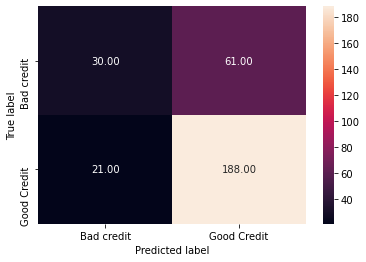

In [ ]:
draw_cm( y_pred_df.actual, 
         y_pred_df.predicted )

Again each row represents the actual bad credit and good credit observations present in the test dataset and each column represents predicted values. So the following can be noted from the chart,

- Left-top quadrant represents actual bad credit and correctly classified as bad credit. This is called True Positives(TP).
- Left-down quadrant represents actual good credit and incorrectly classified as bad credit. This is called False Positives(FP).
- Right-top quadrant represents actual bad credit and incorrectly classified as good credit. This is called False Negatives(FN).
- Left-top quadrant represents actual good credit and correctly classified as good credit. This is called True Negatives(TN).

### Measuring Accuracies

In classification, the model performance is often measured using concepts such as sensitivity, specificity and precision. The ability of the model to correctly classify positives and negatives are called sensitivity and specificity, respectively. The terminologies sensitivity and specificity originated in medical diagnostics.

**Precision** is defined as how many are actual positives out of total number of positives identified by the model and is defined as 

$TPR = ({\frac {TP}{TP+FP}})$

**True Positive Rate (TPR) or Recall or Sensitivity** is how many actual positive are properly identified by the model out of total number actual positive in the test set and is defined as 

$TPR = ({\frac {TP}{TP+FN}})$

**True Negative Rate (TNR) or Specificity** is how many are correctly indentified as correct negatives out of all acutal negative present in the test set and is defined as 

$TNR = ({\frac {TN}{FP+TN}})$

**F-Score (F-Measure)** is another measure used in binary logistic regression that combines both precision and recall (harmonic mean of precision and recall) and is given by 

${F1−score}$ = $({\frac {2 x Precision x Recall}{ Precision + Recall }})$

*classification_report* method in *skearn.metrics* give a detailed report of precision, recall and f1-score for each classes.

In [ ]:
print( metrics.classification_report( y_pred_df.actual, 
                                     y_pred_df.predicted ) )

              precision    recall  f1-score   support

           0       0.76      0.90      0.82       209
           1       0.59      0.33      0.42        91

    accuracy                           0.73       300
   macro avg       0.67      0.61      0.62       300
weighted avg       0.70      0.73      0.70       300



The model is very good at identifying the good credits, but not very good at indentifying bad credits. But this is the result for cutoff probability 0.5. This can be improved by choosing the right cutoff probability.

To understand better we can investigate how the distributions of predicted probabilities of for bad credit and good credit look like? 

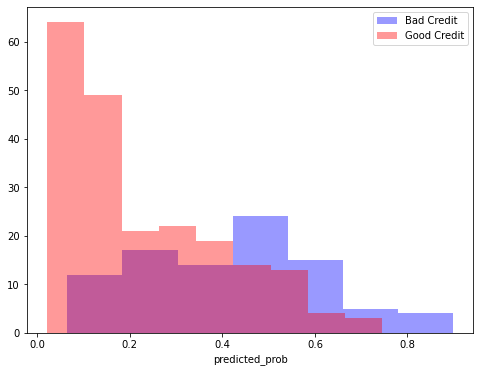

In [ ]:
plt.figure( figsize = (8,6) )
sn.distplot( y_pred_df[y_pred_df.actual == 1]["predicted_prob"], 
            kde=False, color = 'b', 
            label = 'Bad Credit' )
sn.distplot( y_pred_df[y_pred_df.actual == 0]["predicted_prob"], 
            kde=False, color = 'r', 
            label = 'Good Credit' )
plt.legend()
plt.show()

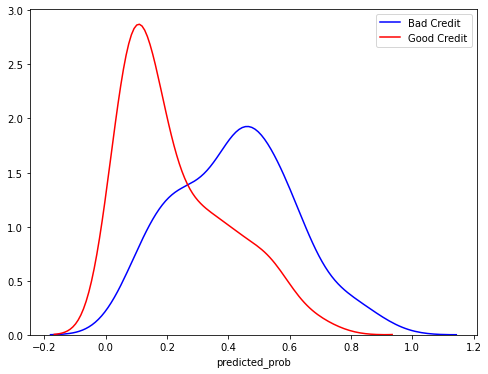

In [ ]:
plt.figure( figsize = (8,6) )
sn.distplot( y_pred_df[y_pred_df.actual == 1]["predicted_prob"], 
            kde=True, hist = False, color = 'b', 
            label = 'Bad Credit' )
sn.distplot( y_pred_df[y_pred_df.actual == 0]["predicted_prob"], 
            kde=True, hist = False, color = 'r', 
            label = 'Good Credit' )
plt.legend()
plt.show()

A large overlap region indicates that the model is not able to distinguish the positives from negatives and hence results in many false positive and false negatives.

#### ROC & AUC
Receiver operating characteristic (ROC) curve can be used to understand the overall worth of a classification models. 

ROC curve is a plot between sensitivity (true positive rate) in the vertical axis and 1 – specificity (false positive rate) in the horizontal axis.

*metrics.roc_curve()* returns different threshold (cut-off) values and their corresponding false positive and true positive rates. Then these values can be takes and plotted to creat the ROC curve.  *metrics.roc_auc_score()* returns the AUC (Area Under the Curve).

In [ ]:
def draw_roc( actual, probs ):
    fpr, \
    tpr, \
    thresholds = metrics.roc_curve( actual, 
                                    probs,
                                    drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(8, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()
    
    return fpr, tpr, thresholds

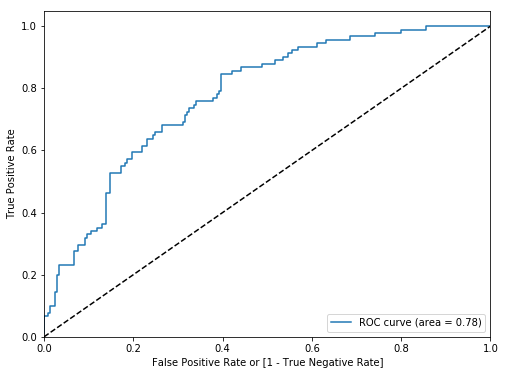

In [ ]:
fpr, tpr, thresholds = draw_roc( y_pred_df.actual, 
                                 y_pred_df.predicted_prob)

The diagonal line represents the case of not using a model (no discrimination between positive and negative); the area below the diagonal line is equal to 0.5.

- As a thumb rule, AUC of at least 0.7 is required for practical application of the model. 
- AUC of greater than 0.9 implies an outstanding model. 

- Caution should be used while selecting models based on AUC, especially when the data is imbalanced (that is, data set which has less than 10% positives). In case of imbalanced data sets, the AUC may be very high (greater than 0.9); however, either sensitivity or specificity values may be poor.

For this example, the AUC is 0.78, which implies the model is fairly good. 

The AUC can also be obtained by calling *roc_auc_score* from *sklearn.metrics*.

In [ ]:
auc_score = metrics.roc_auc_score( y_pred_df.actual, 
                                  y_pred_df.predicted_prob  )
round( float( auc_score ), 2 )

0.78

### Finding Optimal Cutoff

While using logistic regression model, one of the decisions that a data scientist has to make is to choose the right classification cut-off probability (Pc). The overall accuracy, sensitivity and specificity will depend on the chosen cut-off probability. The following two methods are used for selecting the cut-off probability. 

1. Youden’s Index 
2. Cost based approach

#### Youden's index

Sensitivity and specificity change when we change the cut-off probability. Youden’s Index (Youden, 1950) is a classification cut-off probability for which the following function is maximized (also known as J statistic): 

Youden’s Index = J Statistic = Max P [Sensitivity(p) + Specificity(p) – 1]

- That is when (TPR+TNR -1) is maximum. TPR is true positive rate and TNR is true negative rate.
    - max( TPR - (1 - TNR) )
    - max( TPR - FPR )

In [ ]:
tpr_fpr = pd.DataFrame( { 'tpr': tpr, 
                         'fpr': fpr, 
                         'thresholds': thresholds } )

tpr_fpr['diff'] = tpr_fpr.tpr - tpr_fpr.fpr
tpr_fpr.sort_values( 'diff', ascending = False )[0:5]

,fpr,thresholds,tpr,diff
159,0.397129,0.221534,0.846154,0.449025
160,0.401914,0.216531,0.846154,0.444240
161,0.406699,0.215591,0.846154,0.439455
158,0.397129,0.223980,0.835165,0.438036
165,0.421053,0.207107,0.857143,0.436090


So, the optimal cut-off is *0.22* as the difference between fpr and tpr is maximum *0.449025*. 

In [ ]:
y_pred_df['predicted_new'] = y_pred_df.predicted_prob.map( 
                                lambda x: 1 if x > 0.22 else 0)

Let's draw the confustion matrix as per the new predictions. 

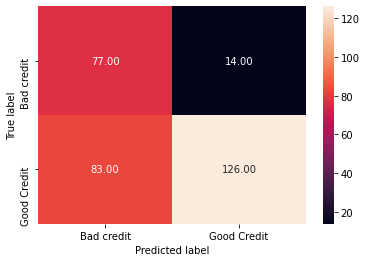

In [ ]:
draw_cm( y_pred_df.actual, 
        y_pred_df.predicted_new)

Let's look at detailed classification report.

In [ ]:
print(metrics.classification_report( y_pred_df.actual, 
                                     y_pred_df.predicted_new ))

              precision    recall  f1-score   support

           0       0.90      0.60      0.72       209
           1       0.48      0.85      0.61        91

    accuracy                           0.68       300
   macro avg       0.69      0.72      0.67       300
weighted avg       0.77      0.68      0.69       300



### Cost Based Approach

In cost-based approach, we assign penalty cost for misclassification of positives and negatives. Assume that cost of a false positive is C1 and cost of false negative is C2.

The optimal cut-off probability is the one which minimizes the total penalty cost. We will write a function to return the penalty cost for a specific cut-off probability. The function will take actual and predicted values and cost of FPs and FNs and return the total penalty cost. 

In [ ]:
def get_total_cost( actual, predicted, cost_FPs, cost_FNs ):
    cm = metrics.confusion_matrix( actual, predicted, [1,0] )
    cm_mat = np.array( cm )
    return cm_mat[0,1] * cost_FNs + cm_mat[1,0] * cost_FPs

Create a dataframe which will capture the cost against different cut-off probability values.


In [ ]:
cost_df = pd.DataFrame( columns = ['prob', 'cost'])

Let's assume that false negatives (predicting a bad credit to be a good credit) is 5 times costlier than false positives ((predicting a bad credit to be a good credit). Deciding costs will require domain knowledge.

Now, we can calculate the penalty cost for each cut-off probability values between 0.1 and 0.5 with incremental values of 0.01 and sort the costs in ascending order to find the cut-off probabilty at which the penalty cost is minimum. 

In [ ]:
idx = 0

## iterate cut-off probability values between 0.1 and 0.5
for each_prob in range( 10, 50):
    cost = get_total_cost( y_pred_df.actual, 
                          y_pred_df.predicted_prob.map( 
            lambda x: 1 if x > (each_prob/100)  else 0), 1, 5 )
    cost_df.loc[idx] = [(each_prob/100), cost] 
    idx += 1

In [ ]:
cost_df.sort_values( 'cost', ascending = True )[0:5]

,prob,cost
4,0.14,150.0
12,0.22,153.0
2,0.12,154.0
10,0.20,154.0
9,0.19,156.0


The lowest cost is achieved at cutoff probability *0.14*. So, let's predict everything beyond 0.14 as bad credit and below as good credit.

In [ ]:
y_pred_df['predicted_using_cost'] = y_pred_df.predicted_prob.map( 
    lambda x: 1 if x > 0.14 else 0)

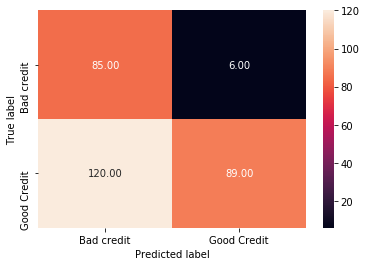

In [ ]:
draw_cm( y_pred_df.actual, 
        y_pred_df.predicted_using_cost )

        Because of very high cost associated, the model has minimized false negatives to only 6.

## Lessons Learnt:

1. In classification problem, the dependent variable Y takes finite discrete values. Logistic regression is one of the most popular techniques used for solving classification problems. 
2. Logistic regression provides the probability of occurrence of the event; final class is usually predicted using a classification cut-off probability. 
3. Decision trees generate rules that can be interprested and business can create strategies around it.
4. The accuracy of an LR model is measured using metrics such as sensitivity, specificity, F-score, precision, and area under the ROC curve. Final model selection may be carried out using any of these metrics. 
5. The optimal classification cut-off probability is usually calculated using Youden’s Index or cost-based approach. 
6. Gain and Lift charts are two approaches used while solving classification problems with imbalanced data sets.